# Galactic spiral structure revealed by Gaia EDR3

This Jupyter notebook plots the overdensities of the Upper Main Sequence (UMS) stars and Cepheids following Poggio et al., 2021 (2021arXiv210301970P, hereafter P+21).

***Please, run this cell and then press the button below it***

In [1]:
from IPython.display import Javascript, display
from ipywidgets import widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

button = widgets.Button(description="Run all below")
button.on_click(run_all)
display(button)

Button(description='Run all below', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## The UMS overdensity map (Figure 1B in P+21)

To make the spiral structure more evident in the distribution of UMS stars, we map the stellar $\it{overdensity} $ $\Delta_{\Sigma}$, defined as

$ \Delta_{\Sigma} (X,Y) = \frac{ \Sigma (X,Y) \, -  \langle \, \Sigma (X,Y) \, \rangle }{\langle \, \Sigma (X,Y) \, \rangle } = \frac{ \Sigma (X,Y) }{\langle \, \Sigma (X,Y) \, \rangle } - 1 \quad, $ 

where $\Sigma(X,Y)$ is the local density at the position $(X,Y)$ in the Galactic plane, and $\langle \, \Sigma (X,Y) \, \rangle$ is the mean density. Both $\Sigma(X,Y)$ and $\langle \, \Sigma (X,Y) \, \rangle$ are calculated via a bivariate kernel density estimator, but using two different bandwidths, i.e. 0.3 kpc and 2 kpc for the local and mean density, respectively. Details on the calculation of $\Sigma(X,Y)$ and $\langle \, \Sigma (X,Y) \, \rangle$ are given in Section 3 and Appendix B in P+21.

In [11]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [12]:
xvalues=np.load('data/xvalues.npy')
yvalues=np.load('data/yvalues.npy')
overdens_grid=np.load('data/overdens_grid_locscale03.npy')

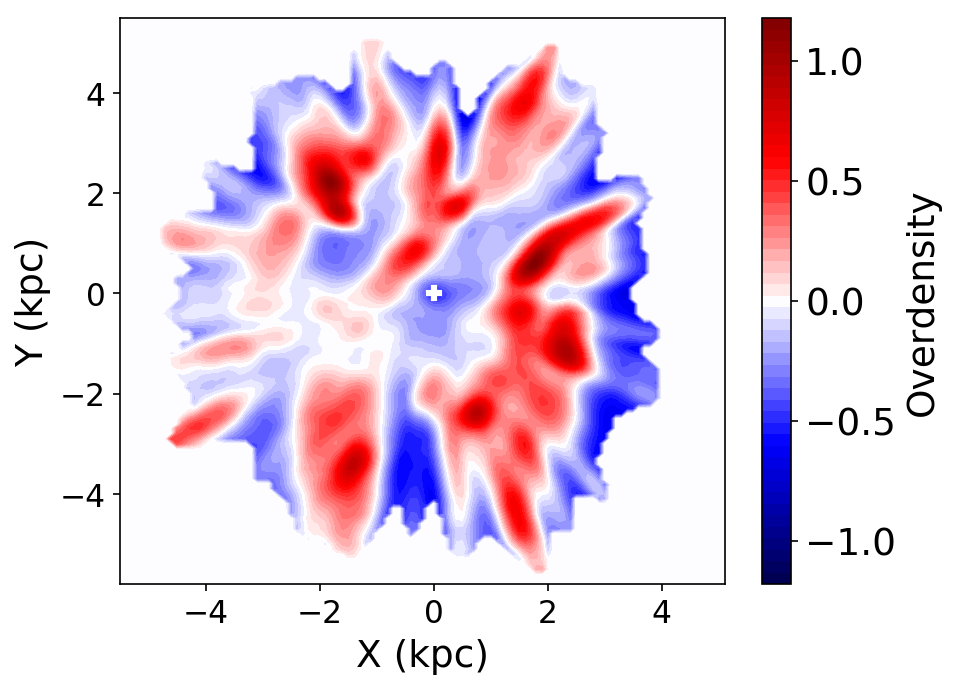

In [13]:
fgsize=(6.5,5.)
fig = plt.figure(figsize=fgsize, dpi=150)

ax = fig.gca()

iniz=-1.18
fin=1.18
N_levels=50
levels=np.linspace(iniz,fin,N_levels)
cset1 = ax.contourf(xvalues, yvalues,overdens_grid.T, levels=levels, cmap='seismic',vmin=-1.18,vmax=1.18)

cbar=plt.colorbar(mappable=cset1,orientation="vertical",ticks=[-1,-0.5, 0,  0.5, 1])

cbar.set_label('Overdensity', fontsize=18)
cbar.ax.tick_params(labelsize=18) 

ax.set_xlabel('X (kpc)', fontsize=18)
ax.set_ylabel('Y (kpc)', fontsize=18)

ax.set_xlim([-5.5,5.1])
ax.set_ylim([-5.8,5.5])
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.plot([0,0],[0,0],marker='P',c='white',markersize=7) # Sun's position

plt.show()


## Exploring different scalelengths

In this section, we plot the UMS overdensity map using different bandwidths for the local density $\Sigma(X,Y)$. Below you can choose between the following values: 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 and 0.8 kpc.

**Figure 1B in P+21 used bandwidth 0.3 kpc.**

In [17]:
def f(scale):
    overdens_grid_newscale=np.load('data/overdens_grid_locscale0{}.npy'.format(int(scale/100))) 
    
    fgsize=(6.5,5.)
    fig = plt.figure(figsize=fgsize, dpi=150)

    ax = fig.gca()

    iniz=-1.2
    fin=1.2
    N_levels=50
    levels=np.linspace(iniz,fin,N_levels)
    cset1 = ax.contourf(xvalues, yvalues,overdens_grid_newscale.T, levels=levels, 
                        cmap='seismic',vmin=-1.2,vmax=1.2)

    cbar=plt.colorbar(mappable=cset1,orientation="vertical",ticks=[-1,-0.5, 0,  0.5, 1])

    cbar.set_label('Overdensity', fontsize=18)
    cbar.ax.tick_params(labelsize=18) 

    ax.set_xlabel('X (kpc)', fontsize=18)
    ax.set_ylabel('Y (kpc)', fontsize=18)
    ax.set_title('Local density bandwidth: {} kpc'.format(scale/1000))
    
    ax.set_xlim([-5.5,5.1])
    ax.set_ylim([-5.8,5.5])
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.plot([0,0],[0,0],marker='P',c='white',markersize=7) # Sun's position
    
    plt.show()

interactive_plot = interactive(f, scale=widgets.IntSlider(min=200, max=800, step=100))
output = interactive_plot.children[-1]
output.layout.height = '750px'
interactive_plot

interactive(children=(IntSlider(value=200, description='scale', max=800, min=200, step=100), Output(layout=Lay…

## The UMS wavelet map (Figure 1C in P+21)

In this section, we plot the UMS overdensity map using different scales of the Wavelet transformation of the UMS density map. Below you can choose between the scales ranging from 0 to 5, corresponding to structures of approximately 0.05, 0.10, 0.20, 0.40, 0.80 and 1.600 kpc respectively. 

**Figure 1C in P+21 used wavelet scale 3.**

In [15]:
swt_ums = np.load('data/swt_MRI_6+1scales_binsize0.05kpc_B-splineWT_UMS.npy')
binsize_ums = 0.05 #kpc

def f2(scale):
    fgsize=(6.5,5.)
    fig = plt.figure(figsize=fgsize, dpi=150)

    ax = fig.gca()

    iniz=-1.18
    fin=1.18
    N_levels=50
    levels=np.linspace(iniz,fin,N_levels)
    cset1 = ax.imshow(swt_ums[scale,:,:].T, extent=(-6,6,6,-6), 
                        cmap='RdGy_r',vmin=-8.5,vmax=8.5)

    cbar=plt.colorbar(mappable=cset1,orientation="vertical")

    cbar.set_label('Wavelet coefficient', fontsize=18)
    cbar.ax.tick_params(labelsize=18) 

    ax.set_xlabel('X (kpc)', fontsize=18)
    ax.set_ylabel('Y (kpc)', fontsize=18)
    ax.set_title('Wavelet Scale: {} (~ {} kpc)'.format(scale,binsize_ums*2**scale))

    ax.set_xlim([-5.5,5.1])
    ax.set_ylim([-5.8,5.5])
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.plot([0,0],[0,0],marker='P',c='white',markersize=7) # Sun's position

    plt.show()

interactive_plot = interactive(f2, scale=widgets.IntSlider(min=0, max=5, step=1))
output = interactive_plot.children[-1]
output.layout.height = '750px'
interactive_plot

interactive(children=(IntSlider(value=0, description='scale', max=5), Output(layout=Layout(height='750px'))), …

## The Cepheids wavelet map (Figure 4B in P+21)

In this section, we plot the Cepheids overdensity map using different scales of the Wavelet transformation of the Cepheids density map. Below you can choose between the scales ranging from 0 to 4, corresponding to structures of approximately 0.25, 0.5, 1, 2 and 4 kpc respectively. 

**Figure 4B in P+21 used wavelet scale 2.**

In [16]:
swt_cep = np.load('data/swt_MRI_5+1scales_binsize0.25kpc_B-splineWT_ALLcepheids.npy')
binsize_cep = 0.25 #kpc

def f3(scale): 
    fgsize=(6.5,5.)
    fig = plt.figure(figsize=fgsize, dpi=150)

    ax = fig.gca()

    iniz=-1.18
    fin=1.18
    N_levels=50
    levels=np.linspace(iniz,fin,N_levels)
    cset1 = ax.imshow(swt_cep[scale,:,:].T, extent=(-6,6,6,-6), 
                        cmap='RdGy_r',vmin=-1.25,vmax=1.25)

    cbar=plt.colorbar(mappable=cset1,orientation="vertical")

    cbar.set_label('Wavelet coefficient', fontsize=18)
    cbar.ax.tick_params(labelsize=18) 

    ax.set_xlabel('X (kpc)', fontsize=18)
    ax.set_ylabel('Y (kpc)', fontsize=18)
    ax.set_title('Wavelet Scale: {} (~ {} kpc)'.format(scale,binsize_cep*2**scale))

    ax.set_xlim([-5.5,5.1])
    ax.set_ylim([-5.8,5.5])
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.plot([0,0],[0,0],marker='P',c='white',markersize=7) # Sun's position

    plt.show()

interactive_plot = interactive(f3, scale=widgets.IntSlider(min=0, max=4, step=1))
output = interactive_plot.children[-1]
output.layout.height = '750px'
interactive_plot

interactive(children=(IntSlider(value=0, description='scale', max=4), Output(layout=Layout(height='750px'))), …

This notebook was written by E. Poggio, P. Ramos and R. Drimmel